In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, train_test_split, GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from tqdm import tqdm
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import pickle

In [8]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")
from utils import get_tr_data

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
healthy_data = get_tr_data(True)
sz_data = get_tr_data(False)

In [10]:
annotations = ["HA", "HB", "HC", "HD", "H1", "H2", "H3", "H5"]

# Visualization

In [5]:
pca = PCA(n_components=2, random_state=2093487)

In [6]:
total_df = pd.concat([healthy_data, sz_data]).dropna(axis=1)
pca_data_raw = total_df.drop(columns=["batch", "region"]).values

In [8]:
pca_data_raw.shape

(280, 14177)

In [20]:
pca_data = pca.fit_transform(pca_data_raw)

In [26]:
pca_data.shape

(280, 2)

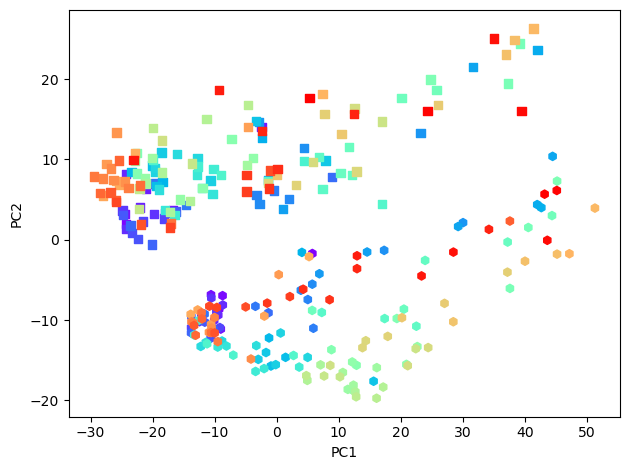

In [40]:
# import matplotlib.cm as cm
# cmap = cm.ScalarMappable(cmap='rainbow')
cmap = "rainbow"

plt.scatter(pca_data[:140, 0], pca_data[:140, 1], c=np.arange(140), cmap=cmap, marker="h")
plt.scatter(pca_data[140:, 0], pca_data[140:, 1], c=np.arange(140), cmap=cmap, marker="s")


# for i in range(len(pca_data)):
#     plt.annotate(annotations[i], (pca_data[i, 0], pca_data[i, 1]))

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()    
plt.savefig("../../data/intermediate/pics/genes_pca_all_regions.pdf", dpi=200)

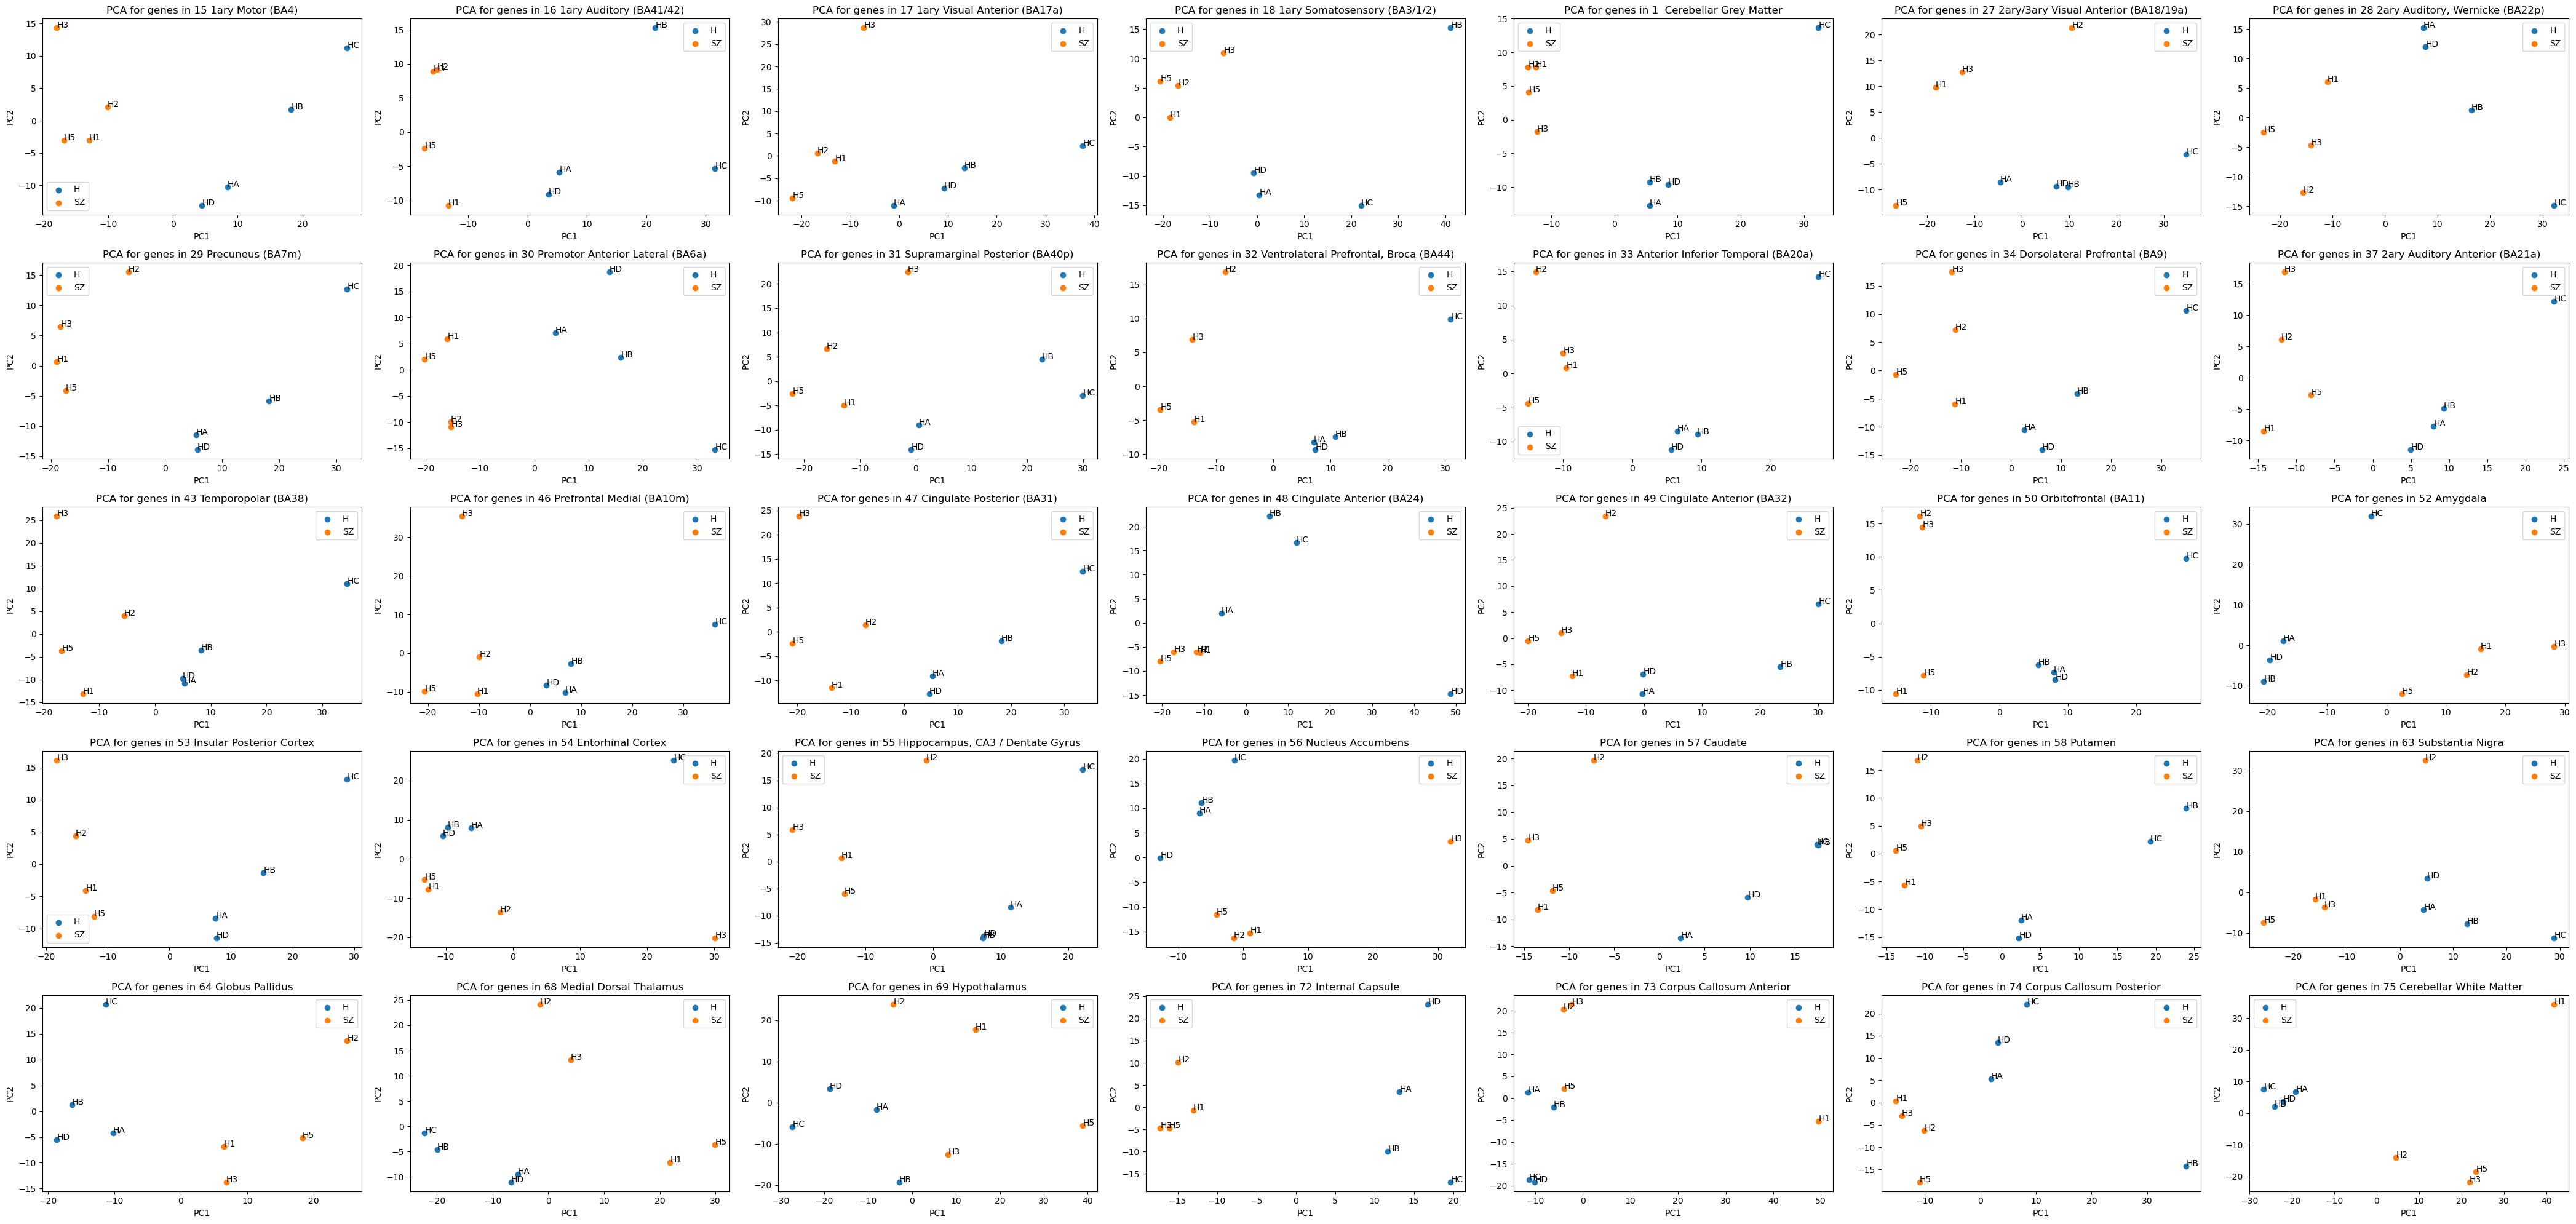

In [6]:
nrows = 5
ncols = 7
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))
axs = axs.flatten()
for i, region_nm in enumerate(sz_data.region.unique()):
    ax = axs[i]
    h_region = healthy_data[healthy_data.region == region_nm].drop(columns=["batch", "region"])
    sz_region = sz_data[sz_data.region == region_nm].drop(columns=["batch", "region"])

    pca_data = pca.fit_transform(pd.concat([h_region, sz_region]).dropna(axis=1))

    ax.scatter(pca_data[:4, 0], pca_data[:4, 1], label="H")
    ax.scatter(pca_data[4:, 0], pca_data[4:, 1], label="SZ")
    
    for i in range(len(pca_data)):
        ax.annotate(annotations[i], (pca_data[i, 0], pca_data[i, 1]))
    
    ax.set_title(f"PCA for genes in {region_nm}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend()
plt.tight_layout()    
# plt.savefig("../../data/intermediate/pics/fig1.pdf", dpi=200)    

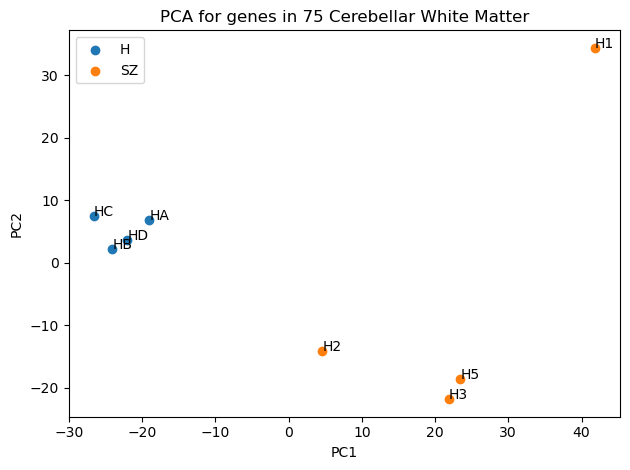

In [8]:
plt.scatter(pca_data[:4, 0], pca_data[:4, 1], label="H")
plt.scatter(pca_data[4:, 0], pca_data[4:, 1], label="SZ")

for i in range(len(pca_data)):
    plt.annotate(annotations[i], (pca_data[i, 0], pca_data[i, 1]))

plt.title(f"PCA for genes in {region_nm}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.tight_layout()    
plt.savefig("../../data/intermediate/pics/genes_pca.pdf", dpi=200)

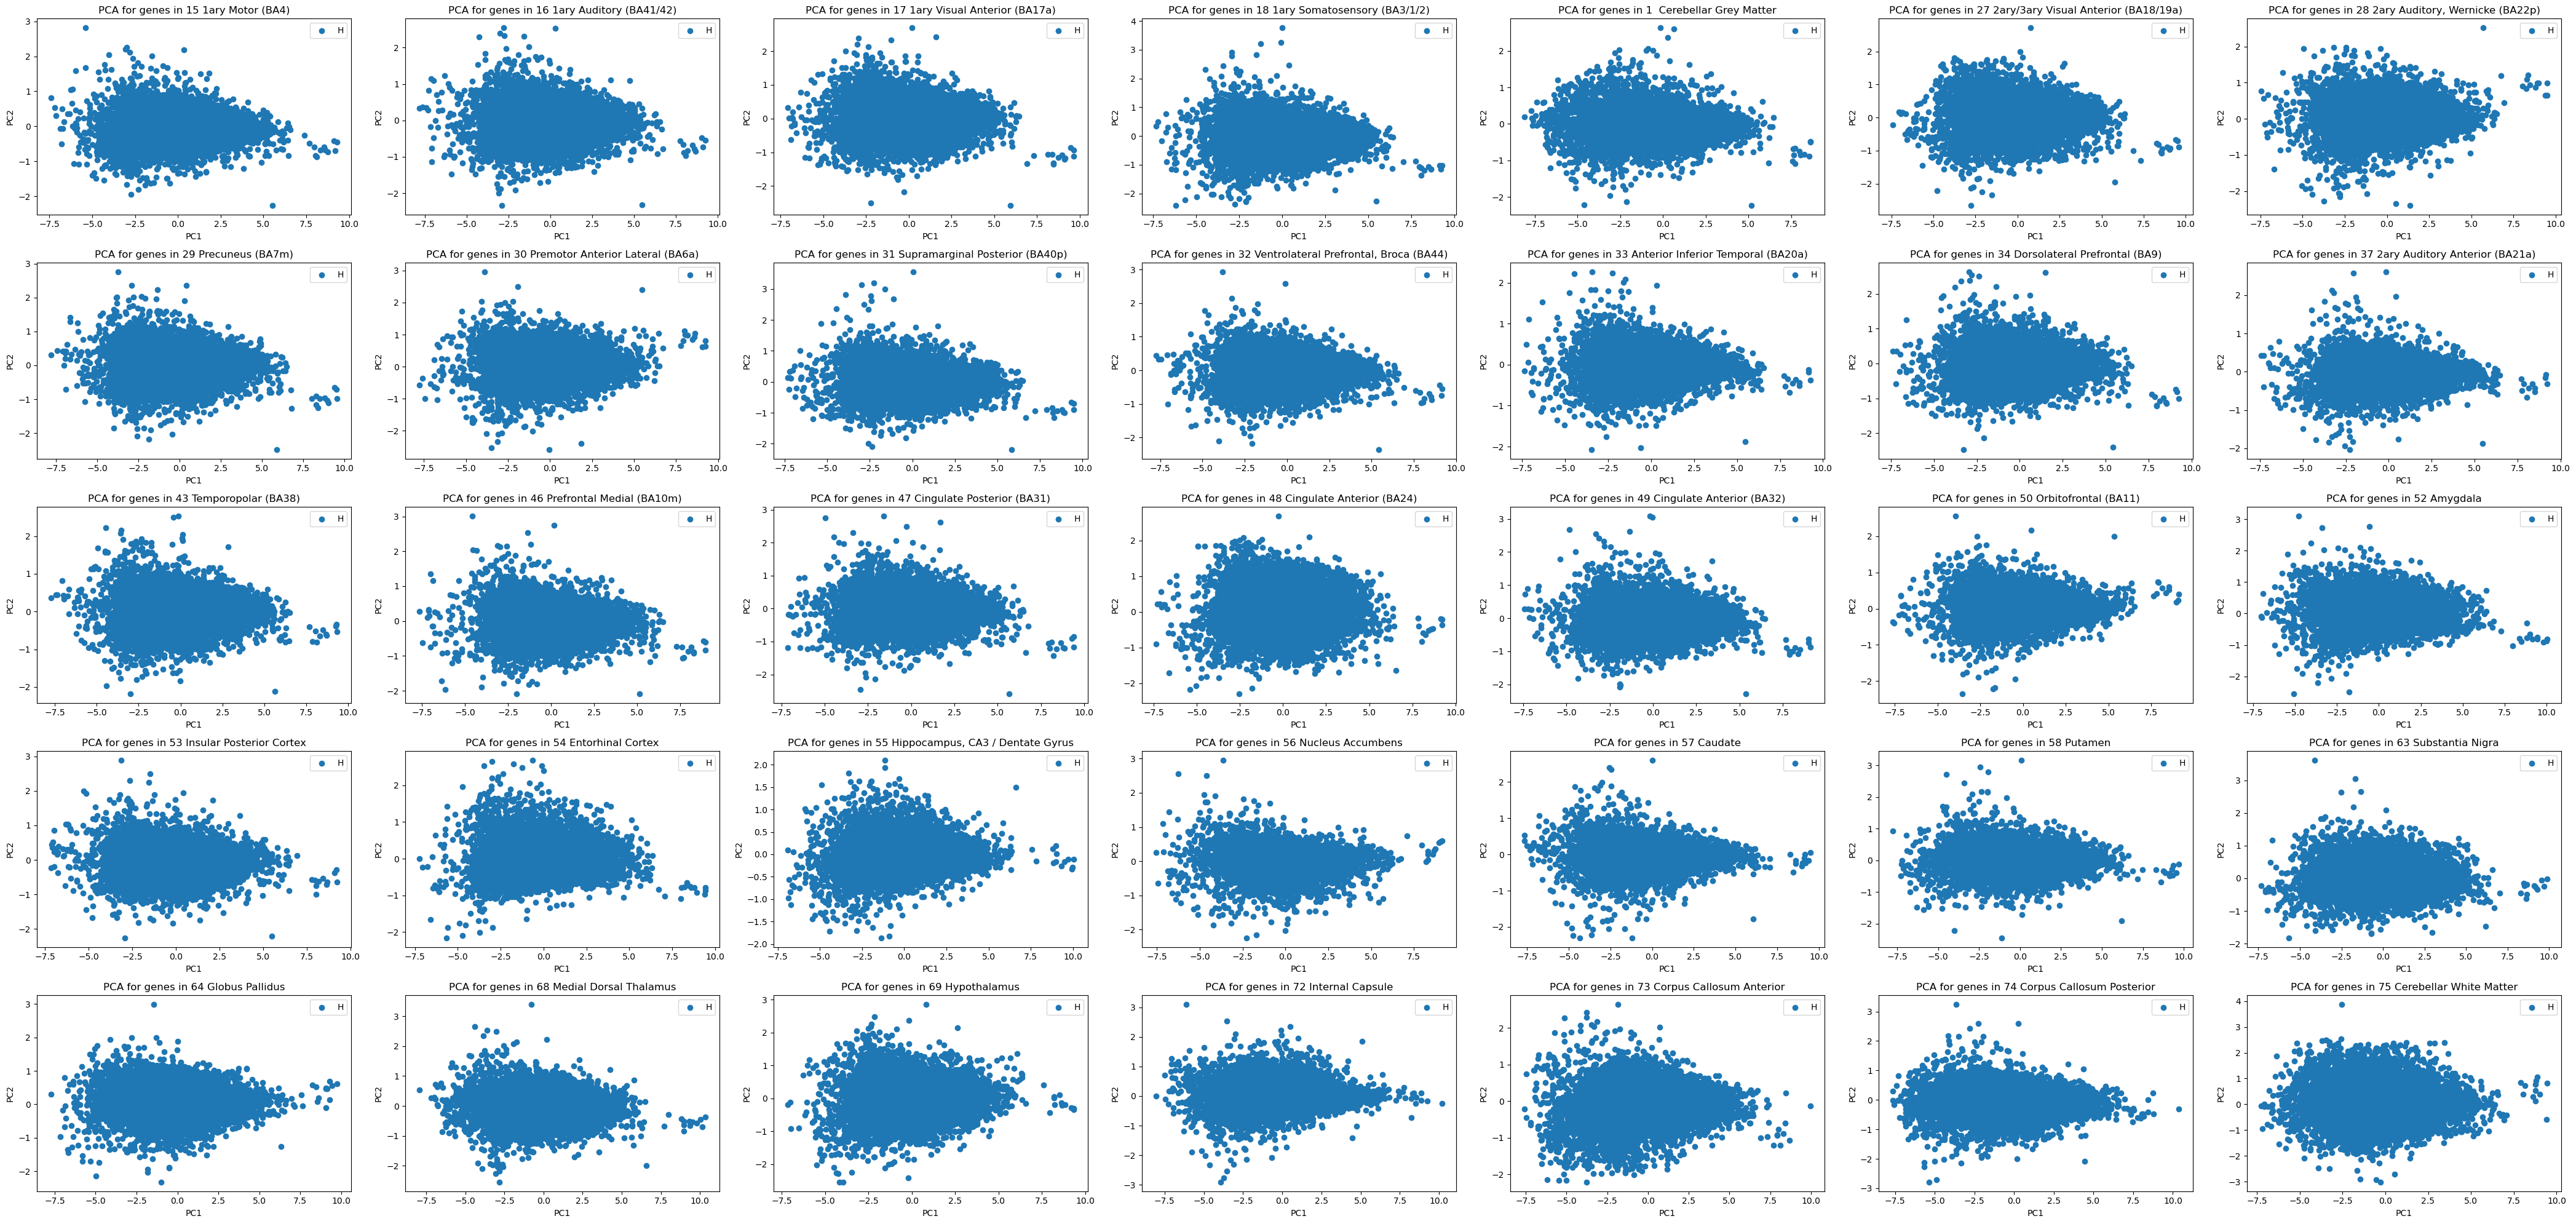

In [11]:
nrows = 5
ncols = 7
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))
axs = axs.flatten()
for i, region_nm in enumerate(sz_data.region.unique()):
    ax = axs[i]
    h_region = healthy_data[healthy_data.region == region_nm].drop(columns=["batch", "region"])
    sz_region = sz_data[sz_data.region == region_nm].drop(columns=["batch", "region"])

    pca_data = pca.fit_transform(pd.concat([h_region, sz_region]).dropna(axis=1).T)

    ax.scatter(pca_data[:, 0], pca_data[:, 1], label="H")
    
    ax.set_title(f"PCA for genes in {region_nm}")
    ax.set_xlabel("PC1")
    ax.set_ylabel("PC2")
    ax.legend()
plt.tight_layout()

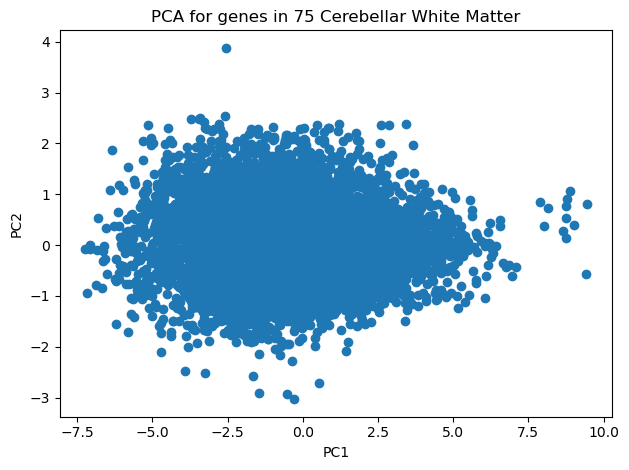

In [12]:
plt.scatter(pca_data[:, 0], pca_data[:, 1])
plt.title(f"PCA for genes in {region_nm}")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.tight_layout()    
plt.savefig("../../data/intermediate/pics/genes_T_pca.pdf", dpi=200)    

In [13]:
tsne = TSNE(init='pca', learning_rate=100, random_state=328987432, n_jobs=-1)
h_region = healthy_data[healthy_data.region == region_nm].drop(columns=["batch", "region"])
sz_region = sz_data[sz_data.region == region_nm].drop(columns=["batch", "region"])
pca_data = tsne.fit_transform(pd.concat([h_region, sz_region]).dropna(axis=1).T)

/home/zybinmikhail/anaconda3/envs/thesis/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


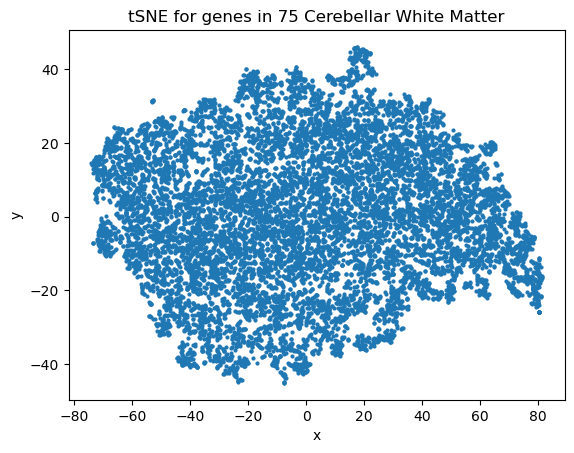

In [14]:
plt.scatter(pca_data[:, 0], pca_data[:, 1], s=2**2, label="H")
plt.title(f"tSNE for genes in {region_nm}")
plt.xlabel("x")
plt.ylabel("y")
plt.savefig("../../data/intermediate/pics/tsne.pdf", dpi=200)

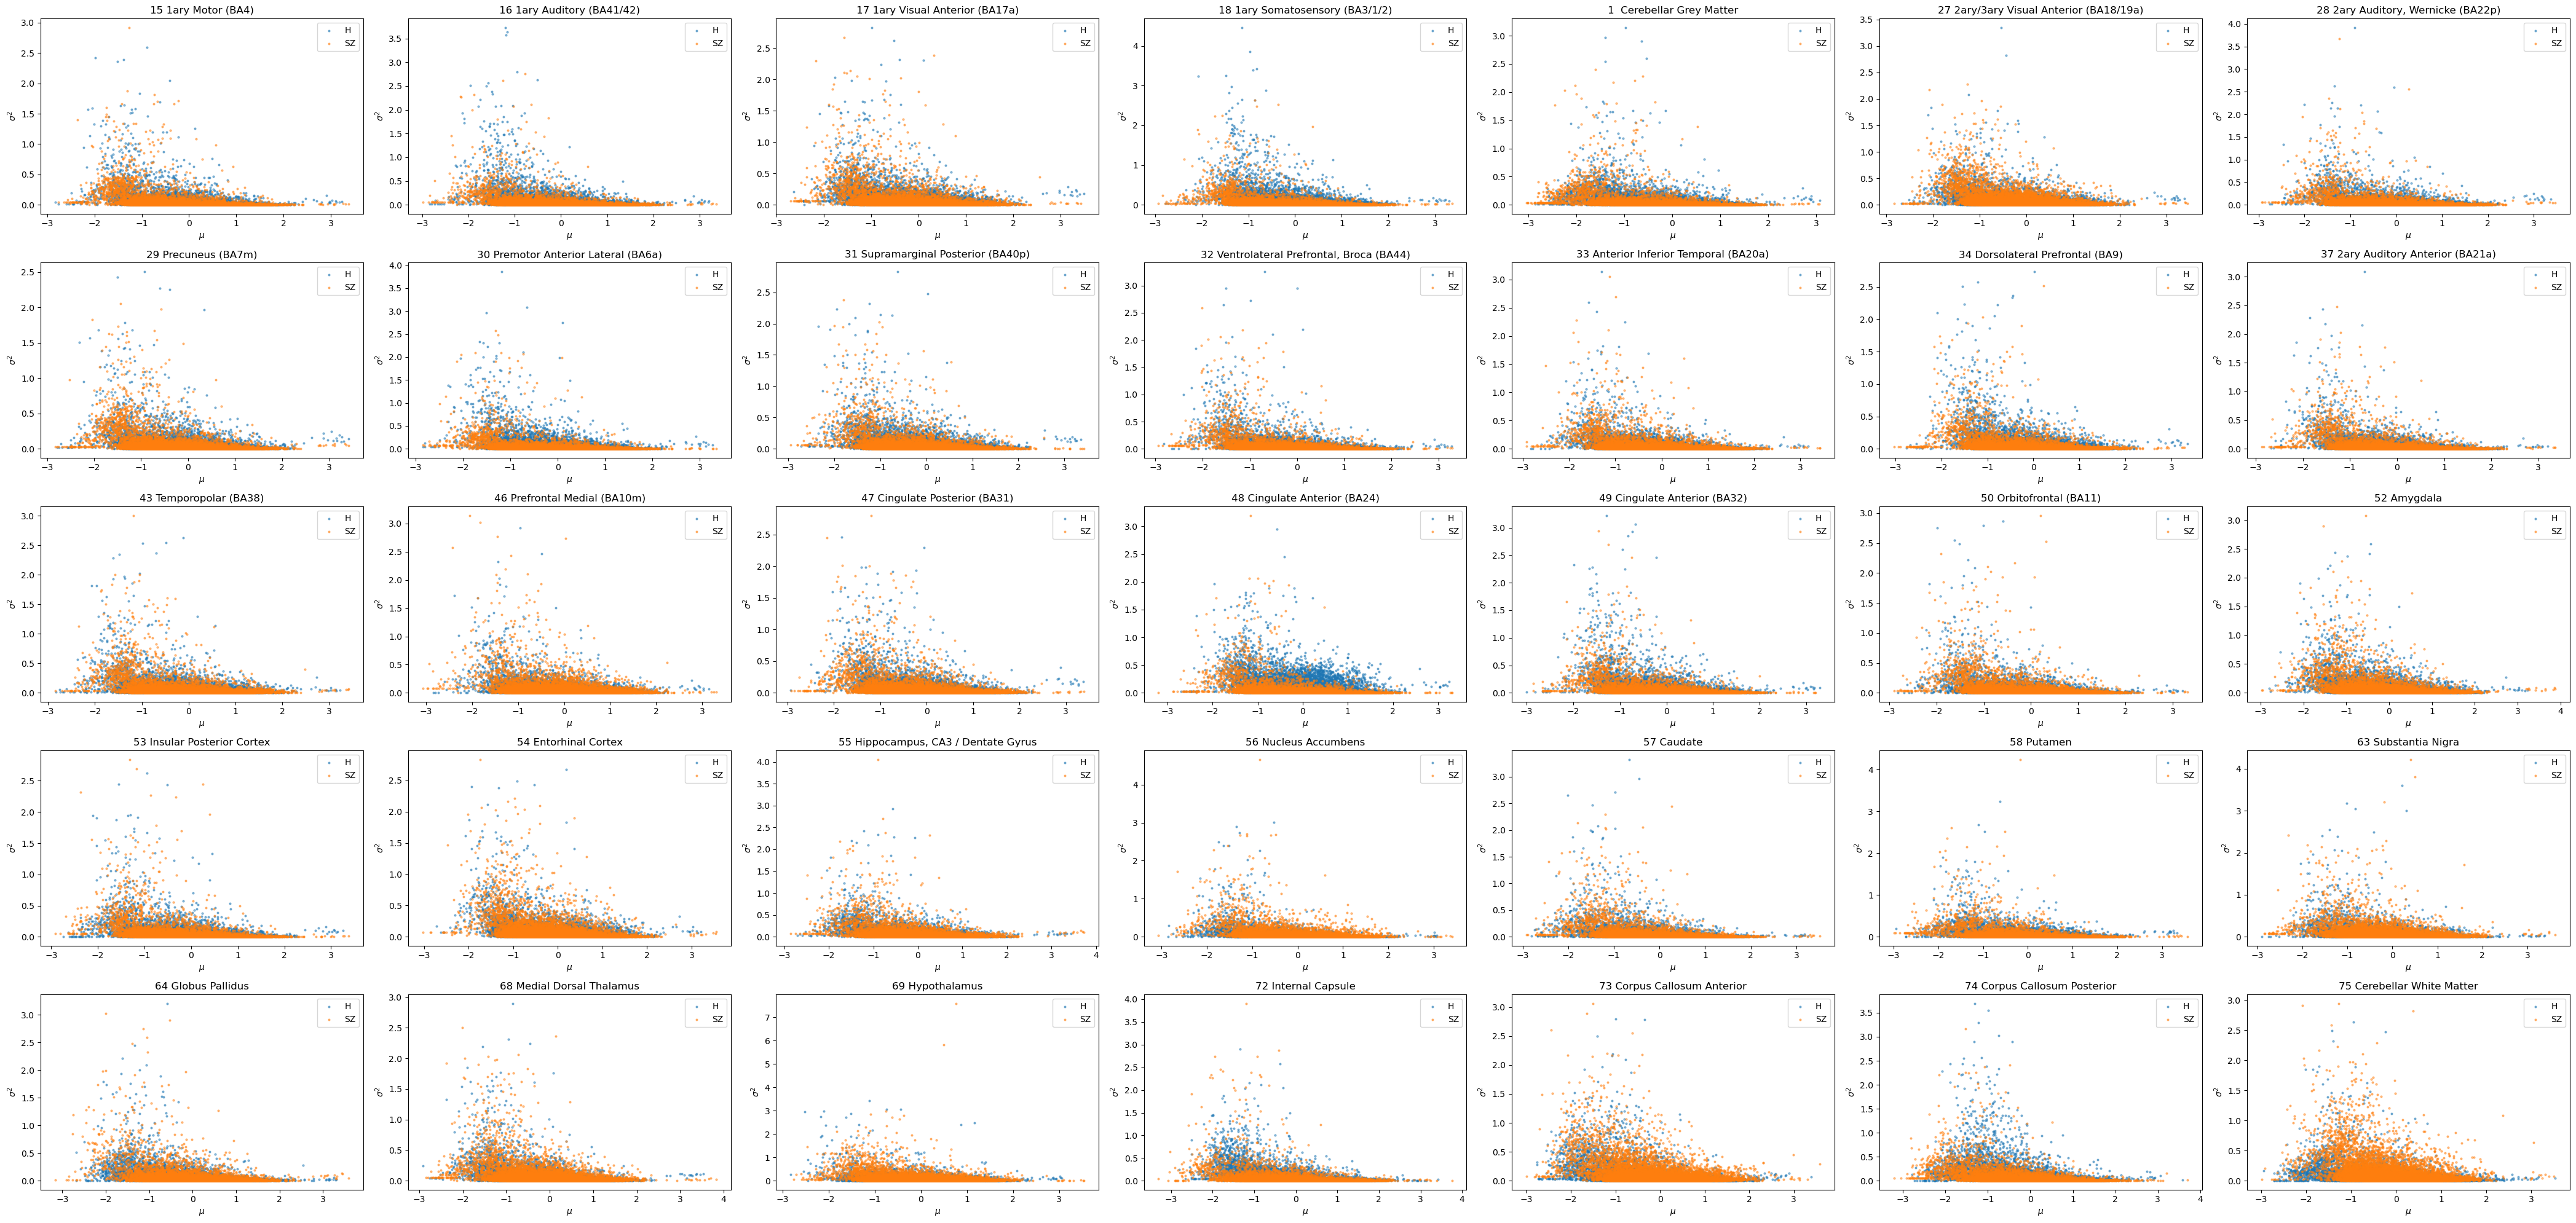

In [5]:
nrows = 5
ncols = 7
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(ncols*6, nrows*4))
axs = axs.flatten()
for i, region_nm in enumerate(sz_data.region.unique()):
    ax = axs[i]
    h_region = healthy_data[healthy_data.region == region_nm].drop(columns=["batch", "region"])
    sz_region = sz_data[sz_data.region == region_nm].drop(columns=["batch", "region"])

    h_means = h_region.mean(axis=0).values
    h_sigma_sq = h_region.var(axis=0).values

    sz_means = sz_region.mean(axis=0).values
    sz_sigma_sq = sz_region.var(axis=0).values

    ax.scatter(h_means, h_sigma_sq, s=2**2, alpha=.5, label="H")
    ax.scatter(sz_means, sz_sigma_sq, s=2**2, alpha=.5, label="SZ")
    
    ax.set_title(region_nm)
    ax.set_xlabel("$\mu$")
    ax.set_ylabel("$\sigma^2$")
    ax.legend()
plt.tight_layout()    

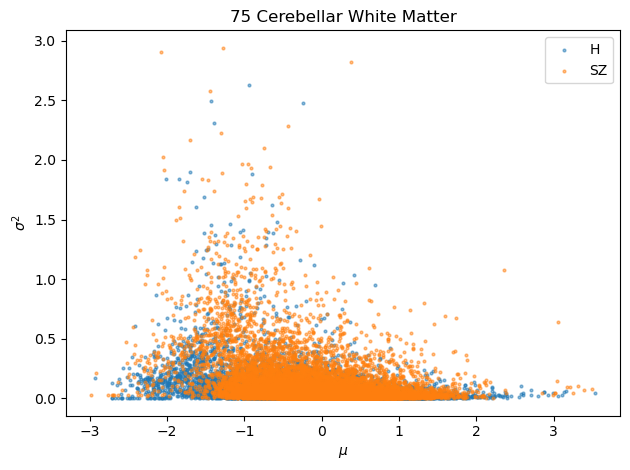

In [7]:
h_region = healthy_data[healthy_data.region == region_nm].drop(columns=["batch", "region"])
sz_region = sz_data[sz_data.region == region_nm].drop(columns=["batch", "region"])

h_means = h_region.mean(axis=0).values
h_sigma_sq = h_region.var(axis=0).values

sz_means = sz_region.mean(axis=0).values
sz_sigma_sq = sz_region.var(axis=0).values

plt.scatter(h_means, h_sigma_sq, s=2**2, alpha=.5, label="H")
plt.scatter(sz_means, sz_sigma_sq, s=2**2, alpha=.5, label="SZ")

plt.title(region_nm)
plt.xlabel("$\mu$")
plt.ylabel("$\sigma^2$")
plt.legend()
plt.tight_layout()    
plt.savefig("../../data/intermediate/pics/genes_mu_sigma.pdf", dpi=200)